# Book By Cover
This notebook intends to predict a book's genre from the cover. I use a dataset found on Github from UchidaLab in Kyushu University (link) which provides book covers, authors, title, and genre. In order to classify the book covers, I use Convlutional Neural Networks (CNNs) to detect common features in certain genres. Can I judge a book by its cover?

In [1]:
import pandas as pd
import PIL
from PIL import Image
import requests
import missingno as msno
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

## Preliminary Data Inspection

In [2]:
bookdf = pd.read_csv("book30-listing-train.csv", encoding="utf-8", names=['id', 'imgname', 'imgurl', 'booktitle', 'bookauthor', 'label', 'category'])
bookdf.head(5)
##looking at the data format, making sure all the data was read properly

,id,imgname,imgurl,booktitle,bookauthor,label,category
0,1588345297,1588345297.jpg,http://ecx.images-amazon.com/images/I/51l6XIoa...,With Schwarzkopf: Life Lessons of The Bear,Gus Lee,1,Biographies & Memoirs
1,1404803335,1404803335.jpg,http://ecx.images-amazon.com/images/I/51UJnL3T...,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books
2,1446276082,1446276082.jpg,http://ecx.images-amazon.com/images/I/51MGUKhk...,Energy Security (SAGE Library of International...,NaN,10,Engineering & Transportation
3,1491522666,1491522666.jpg,http://ecx.images-amazon.com/images/I/51qKvjsi...,An Amish Gathering: Life in Lancaster County,Beth Wiseman,9,Christian Books & Bibles
4,970096410,0970096410.jpg,http://ecx.images-amazon.com/images/I/51qoUENb...,City of Rocks Idaho: A Climber's Guide (Region...,Dave Bingham,26,Sports & Outdoors


In [3]:
booklabeldf = pd.read_csv("bookcover30-labels-train.txt", delimiter=" ", names=["filename", 'label'])
booklabeldf.head(10)
##seems the labels aren't entirely necessary, since they're included in the training csv file

,filename,label
0,1588345297.jpg,1
1,1404803335.jpg,4
2,1446276082.jpg,10
3,1491522666.jpg,9
4,0970096410.jpg,26
5,8436808053.jpg,11
6,1848291388.jpg,16
7,0073402656.jpg,23
8,0323045979.jpg,16
9,1847176968.jpg,29


<Axes: >

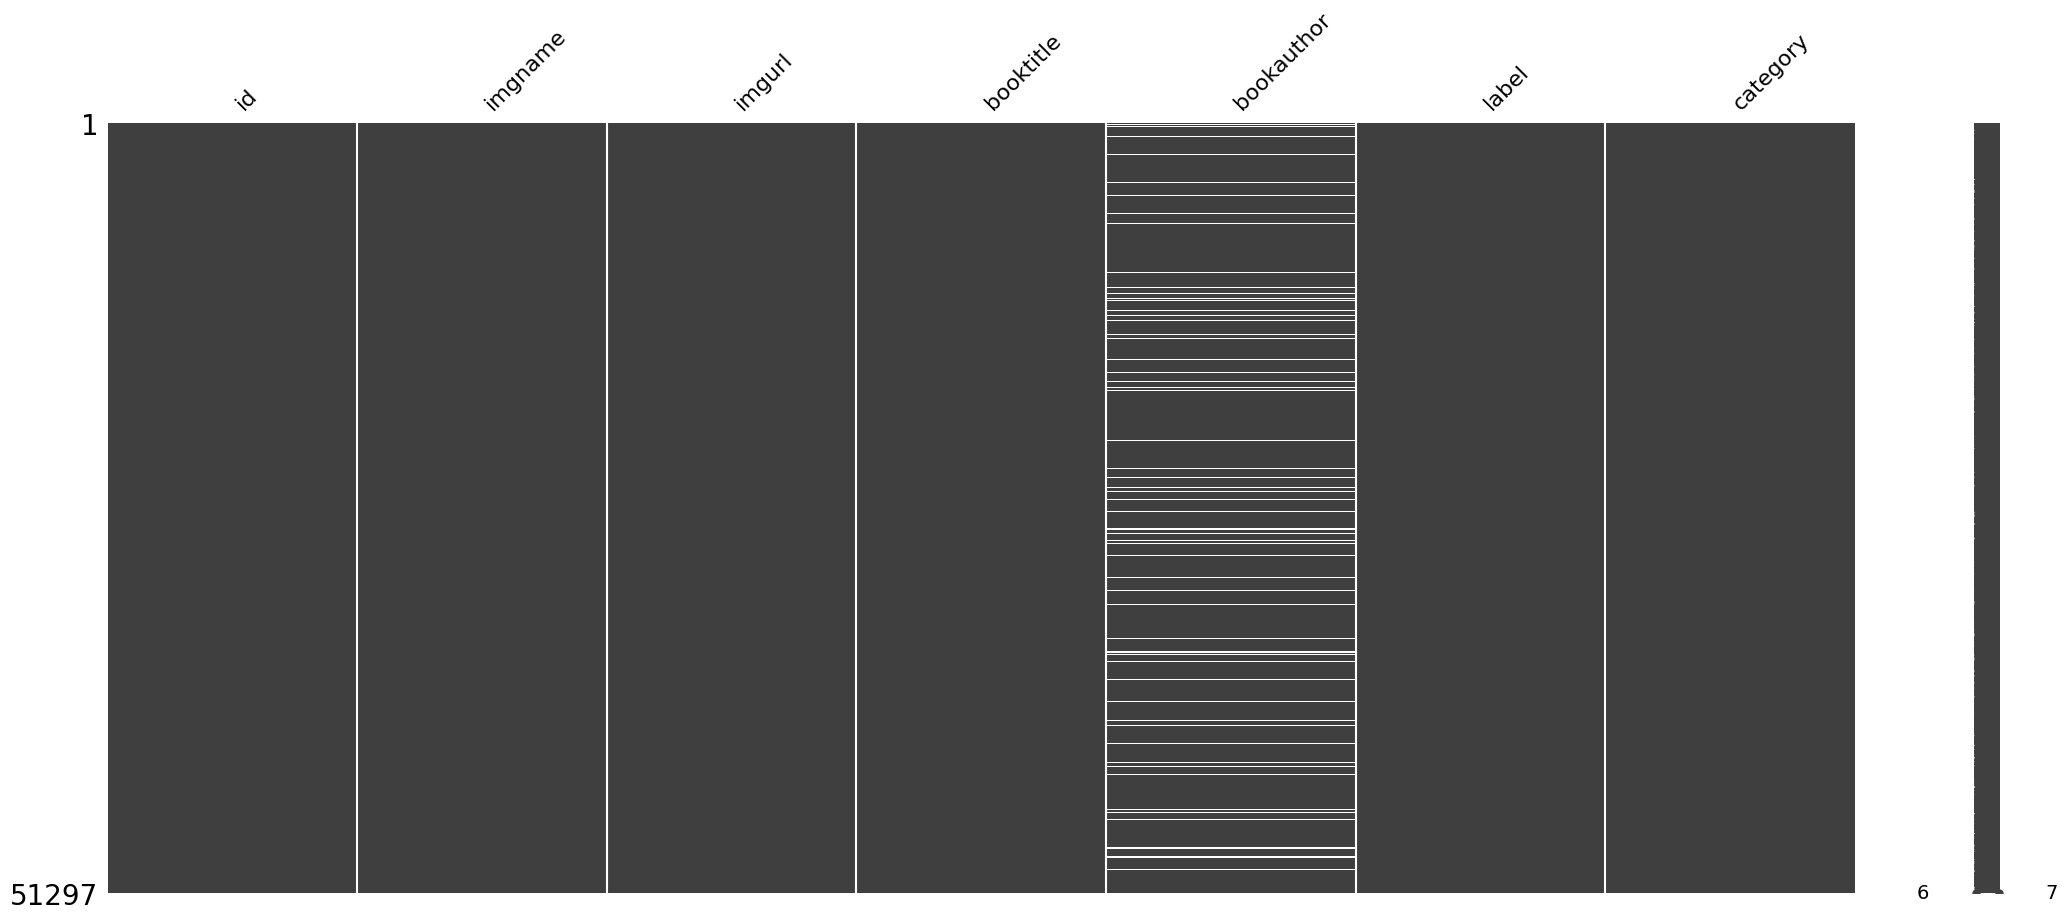

In [4]:
msno.matrix(bookdf)
##checking if there are any missing values in the datset, none of the missing values are in columns 2 or 5.

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.PILToTensor()])
def urltotensor(url):
    i  = Image.open(requests.get(url, stream=True).raw).convert('RGB')
    i=i.resize((256, 256))
    imgtensor = transform(i)
    return imgtensor
bookdf['imgtensors'] = bookdf['imgurl'].map(lambda x: urltotensor(x))
##making sure that the image can be accessed without downloading every file, and checking the variable's datatype

In [10]:
def labeltotensor(label):
    labelTensor = torch.zeros(30)
    labelTensor[int(label)] = 1
    return labelTensor
bookdf['labelTensors'] = bookdf['label'].map(lambda x: labeltotensor(x))

In [12]:
bookdf.head(5)

,id,imgname,imgurl,booktitle,bookauthor,label,category,imgtensors,labelTensors
0,1588345297,1588345297.jpg,http://ecx.images-amazon.com/images/I/51l6XIoa...,With Schwarzkopf: Life Lessons of The Bear,Gus Lee,1,Biographies & Memoirs,"[[[tensor(202, dtype=torch.uint8), tensor(202,...","[tensor(0.), tensor(1.), tensor(0.), tensor(0...."
1,1404803335,1404803335.jpg,http://ecx.images-amazon.com/images/I/51UJnL3T...,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books,"[[[tensor(149, dtype=torch.uint8), tensor(132,...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
2,1446276082,1446276082.jpg,http://ecx.images-amazon.com/images/I/51MGUKhk...,Energy Security (SAGE Library of International...,NaN,10,Engineering & Transportation,"[[[tensor(143, dtype=torch.uint8), tensor(127,...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
3,1491522666,1491522666.jpg,http://ecx.images-amazon.com/images/I/51qKvjsi...,An Amish Gathering: Life in Lancaster County,Beth Wiseman,9,Christian Books & Bibles,"[[[tensor(251, dtype=torch.uint8), tensor(254,...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
4,970096410,0970096410.jpg,http://ecx.images-amazon.com/images/I/51qoUENb...,City of Rocks Idaho: A Climber's Guide (Region...,Dave Bingham,26,Sports & Outdoors,"[[[tensor(68, dtype=torch.uint8), tensor(66, d...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."


In [35]:
bookdf.to_pickle("booktensor.pickle")

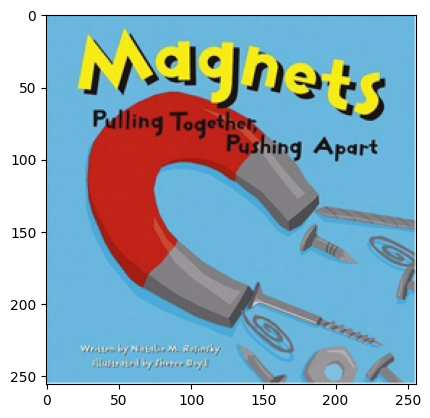

In [14]:
plt.imshow(bookdf.at[1,'imgtensors'].permute(1,2,0))

In [7]:
booktensor = pd.read_pickle("booktensor.pickle")

In [8]:
def hello(x):
    newTensor = torch.zeros(30)
    newTensor[x[5]] = 1
    return newTensor

In [9]:
booktensor[8] = booktensor.apply(lambda x: hello(x), axis=1)
booktensor.head(5)

,0,1,2,3,4,5,6,7,8
0,1588345297,1588345297.jpg,http://ecx.images-amazon.com/images/I/51l6XIoa...,With Schwarzkopf: Life Lessons of The Bear,Gus Lee,1,Biographies & Memoirs,"[[[tensor(202, dtype=torch.uint8), tensor(202,...","[tensor(0.), tensor(1.), tensor(0.), tensor(0...."
1,1404803335,1404803335.jpg,http://ecx.images-amazon.com/images/I/51UJnL3T...,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books,"[[[tensor(149, dtype=torch.uint8), tensor(132,...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
2,1446276082,1446276082.jpg,http://ecx.images-amazon.com/images/I/51MGUKhk...,Energy Security (SAGE Library of International...,NaN,10,Engineering & Transportation,"[[[tensor(143, dtype=torch.uint8), tensor(127,...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
3,1491522666,1491522666.jpg,http://ecx.images-amazon.com/images/I/51qKvjsi...,An Amish Gathering: Life in Lancaster County,Beth Wiseman,9,Christian Books & Bibles,"[[[tensor(251, dtype=torch.uint8), tensor(254,...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
4,970096410,0970096410.jpg,http://ecx.images-amazon.com/images/I/51qoUENb...,City of Rocks Idaho: A Climber's Guide (Region...,Dave Bingham,26,Sports & Outdoors,"[[[tensor(68, dtype=torch.uint8), tensor(66, d...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."


In [31]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*61*61, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 30)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.log_softmax(x, dim=-1)
        return x

In [32]:
def train(num_epochs, train, learning_rate):
    device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
    model = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    model.to(device)
    criterion.to(device)
    for epoch in range(num_epochs):
        count=0
        for i in range(train.shape[0]):
            output = model.forward(train.at[i,'imgtensors'].to(device, torch.float32))
            loss = criterion(output, torch.Tensor(train.at[i,'labelTensors']).to(device, torch.float32))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            count+=1
            if count%1000 == 0:
                print(f"Epoch: {epoch}, Count: {count}, Loss: {loss.item():.4f}")

In [34]:
train(1, bookdf, 0.001)

Epoch: 0, Count: 1000, Loss: 3.8692
Epoch: 0, Count: 2000, Loss: 3.2394
Epoch: 0, Count: 3000, Loss: 4.0453
Epoch: 0, Count: 4000, Loss: 4.1733
Epoch: 0, Count: 5000, Loss: 3.4881
Epoch: 0, Count: 6000, Loss: 4.3003
Epoch: 0, Count: 7000, Loss: 2.9152
Epoch: 0, Count: 8000, Loss: 2.7703
Epoch: 0, Count: 9000, Loss: 2.4174
Epoch: 0, Count: 10000, Loss: 2.6234
Epoch: 0, Count: 11000, Loss: 3.4384
Epoch: 0, Count: 12000, Loss: 4.0693
Epoch: 0, Count: 13000, Loss: 3.0872
Epoch: 0, Count: 14000, Loss: 3.5643
Epoch: 0, Count: 15000, Loss: 2.7801
Epoch: 0, Count: 16000, Loss: 2.9173
Epoch: 0, Count: 17000, Loss: 2.3569
Epoch: 0, Count: 18000, Loss: 3.2818
Epoch: 0, Count: 19000, Loss: 3.8482
Epoch: 0, Count: 20000, Loss: 3.5227
Epoch: 0, Count: 21000, Loss: 3.2083
Epoch: 0, Count: 22000, Loss: 3.6988
Epoch: 0, Count: 23000, Loss: 2.9386
Epoch: 0, Count: 24000, Loss: 3.1528
Epoch: 0, Count: 25000, Loss: 4.1413
Epoch: 0, Count: 26000, Loss: 2.7631
Epoch: 0, Count: 27000, Loss: 4.1757
Epoch: 0, 